
# Cyclist Detection and Distance Estimation Model

## About the Model

### Overview
This application leverages a **YOLOv11n model** from Ultralytics, trained on custom data from [Roboflow’s Bicycle Detection Dataset](https://universe.roboflow.com/bicycle-detection/bike-detect-ct/dataset/5), to detect cyclists effectively. The model is fine-tuned to recognize cyclists in various environments, making it suitable for vehicle-mounted cameras.

### Goals
- **Cyclist Detection**: Accurately identifies cyclists on the road for real-time alerts.
- **Distance Estimation**: Calculates the distance to each detected cyclist using geometric parameters.
- **Warning Indicator**: Cyclists closer than **2 meters** are highlighted with a **red bounding box** as a safety alert.
- **Tracking**: Continuously tracks cyclists using the **ByteTrack algorithm** for stable detection across frames.

### Distance Calculation
Accurate distance estimation is essential for road safety. We use a perspective projection formula:

**Distance = (Actual Height * Focal Length) / Image Height**

- **Actual Height** is set to 1.7 meters, representing an average cyclist’s height.
- **Focal Length** is approximated at 800 pixels for this camera.
- A scaling factor is applied to the calculated distance to enhance proximity detection accuracy.

### How It Works
- **Detection**: Each cyclist is enclosed in a bounding box with the distance displayed on it.
- **Tracking**: The ByteTrack algorithm tracks each cyclist across frames for smooth monitoring.
- **Warnings**: Cyclists within **2 meters** trigger a red bounding box, giving drivers a visual alert.

This model is designed to improve **driver awareness** and **road safety**, making it a valuable tool in driver-assistance systems and autonomous vehicles.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

# Specify the directory in Google Drive (e.g., root directory)
drive_path = '/content/drive/MyDrive/'

# List all files and folders
for root, dirs, files in os.walk(drive_path):
    print("Folders:", dirs)
    print("Files:", files)
    break  # Remove this line if you want to list files in all subdirectories

Folders: ['alpaca_detection_yolo', 'image_detection']
Files: ['WW Programm.pdf']


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 12.8 MB/s eta 0:00:00


In [4]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/107.7 GB disk)


In [5]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="###################")
project = rf.workspace("bicycle-detection").project("bike-detect-ct")
version = project.version(4)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Bike-Detect---CT-4 in yolov11:: 100%|██████████| 29088/29088 [00:41<00:00, 698.32it/s] 


In [ ]:
dataset.location

'/content/Bike-Detect---CT-4'

In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=10 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 159MB/s]
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Bike-Detect---CT-4/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=

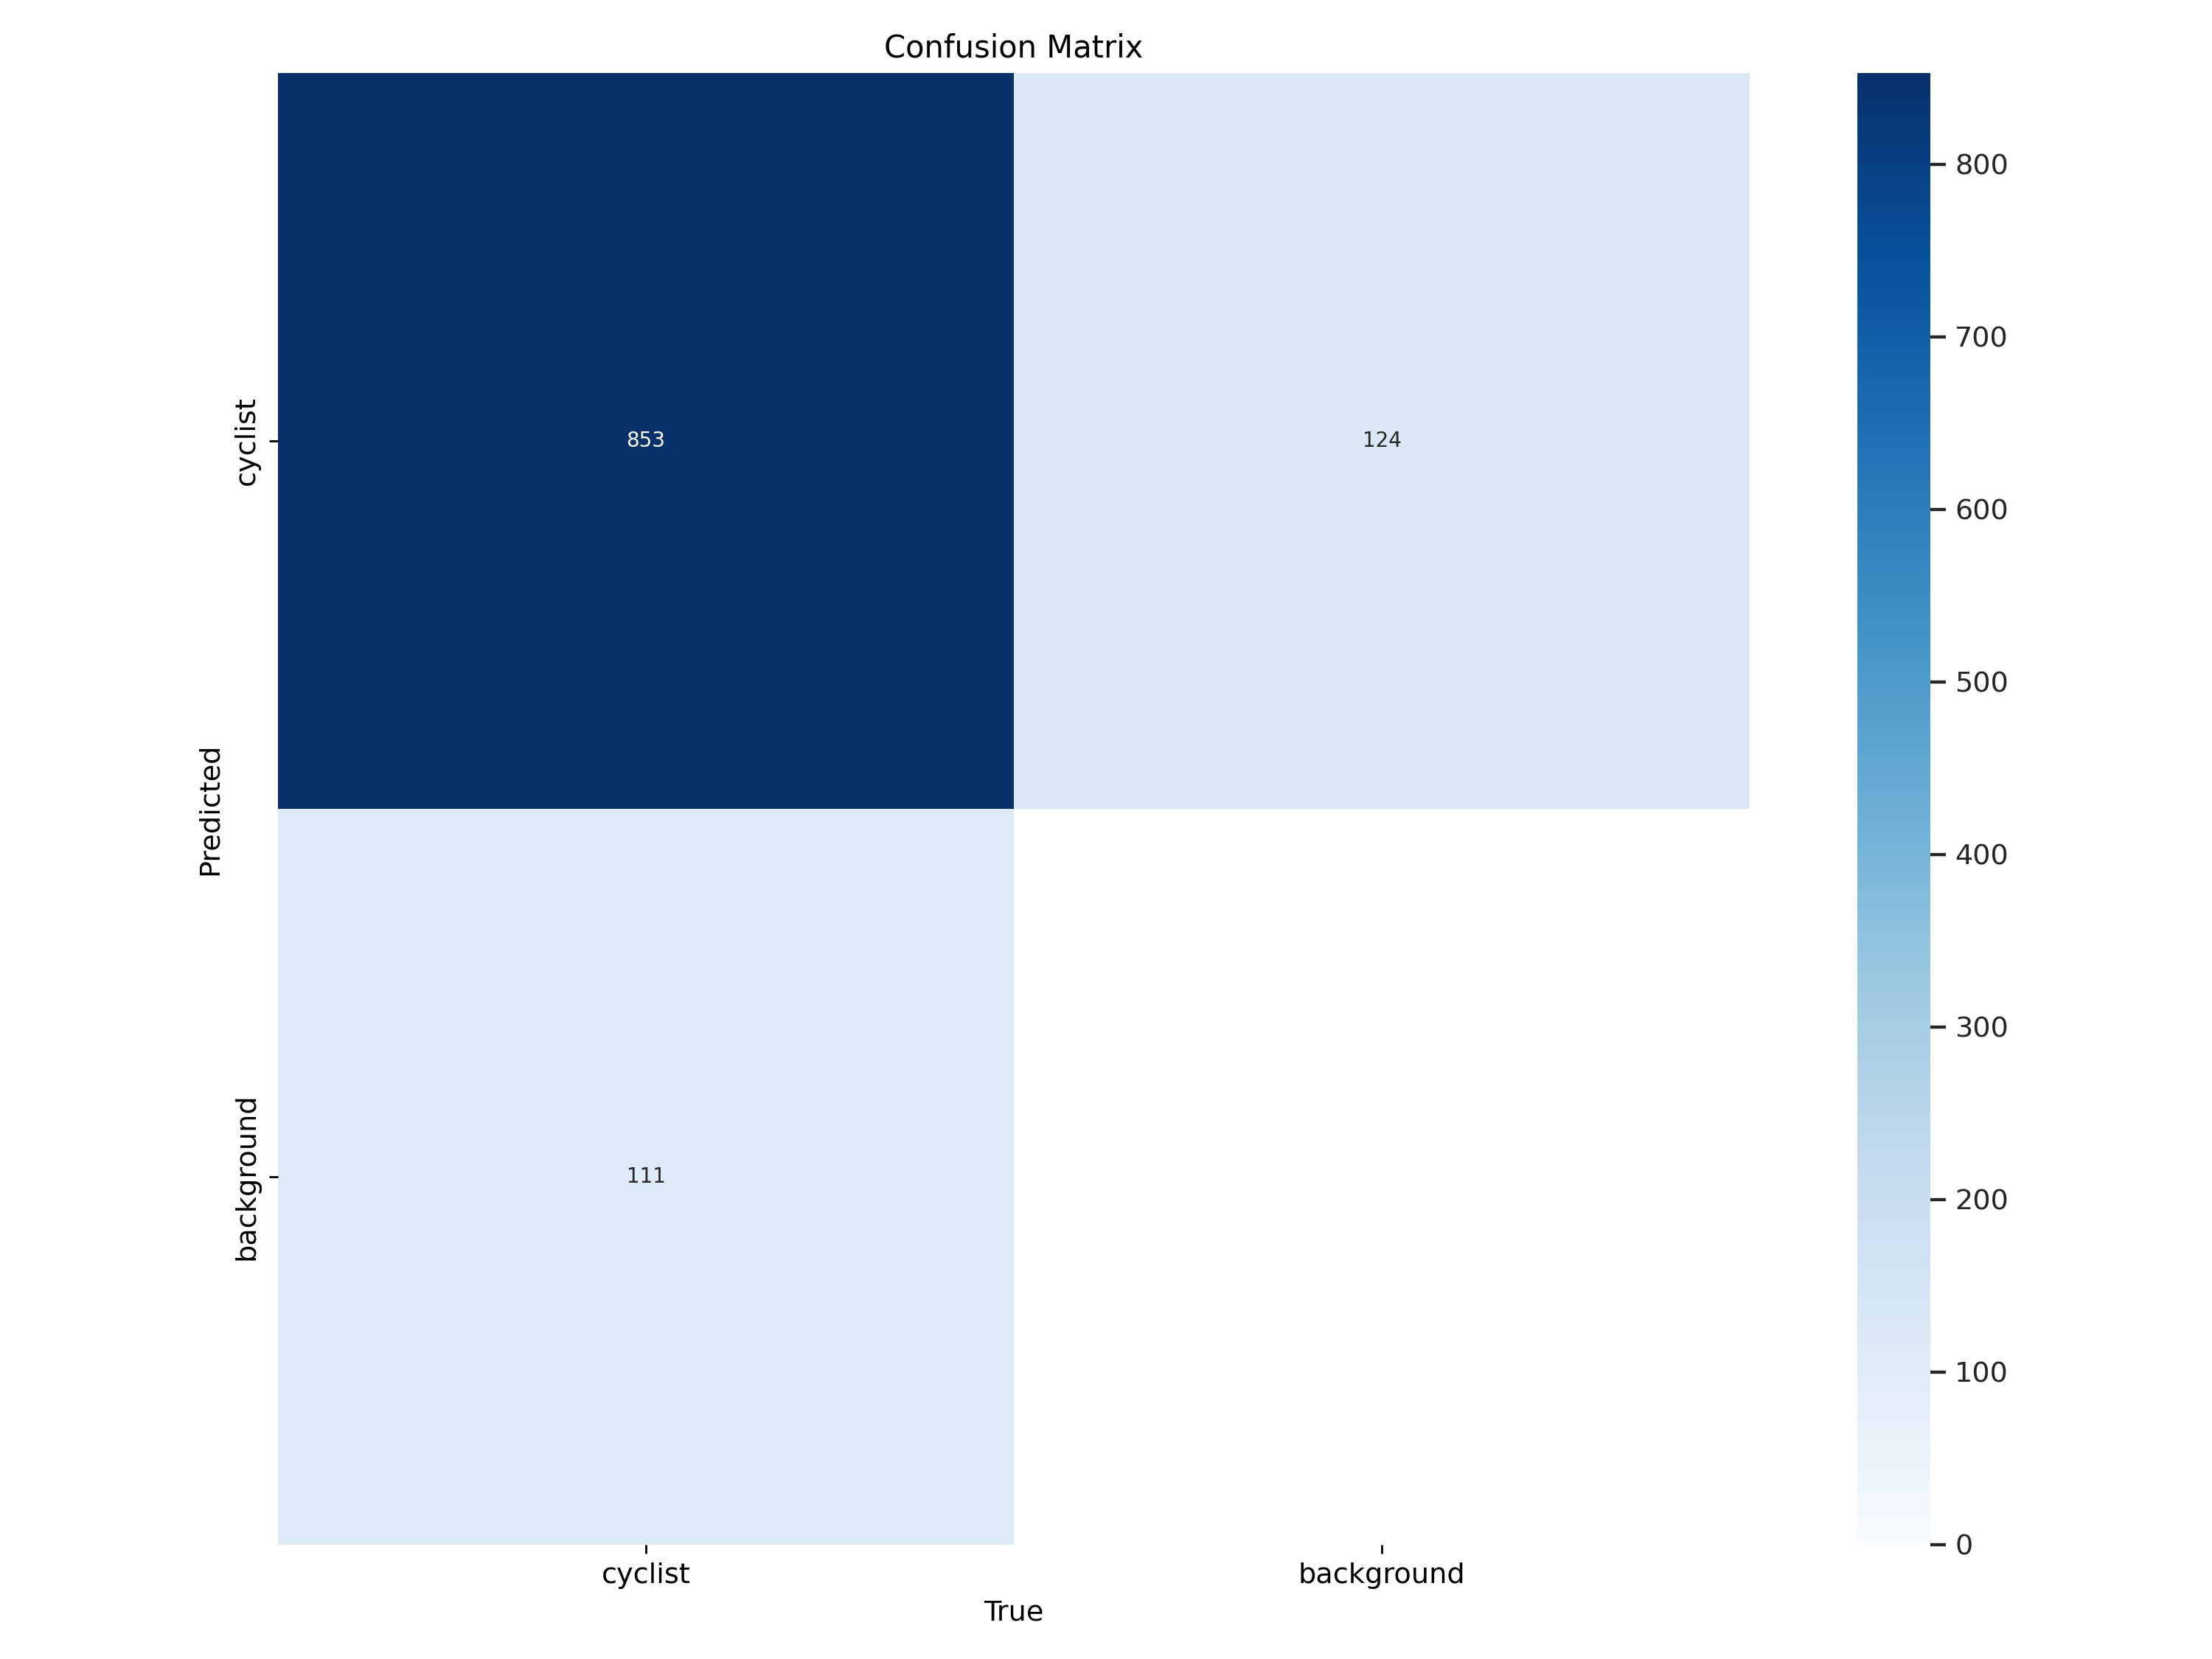

In [6]:
Image("/content/drive/MyDrive/alpaca_detection_yolo/bike-detection-generated10/runs/detect/train/confusion_matrix.png", width=600)

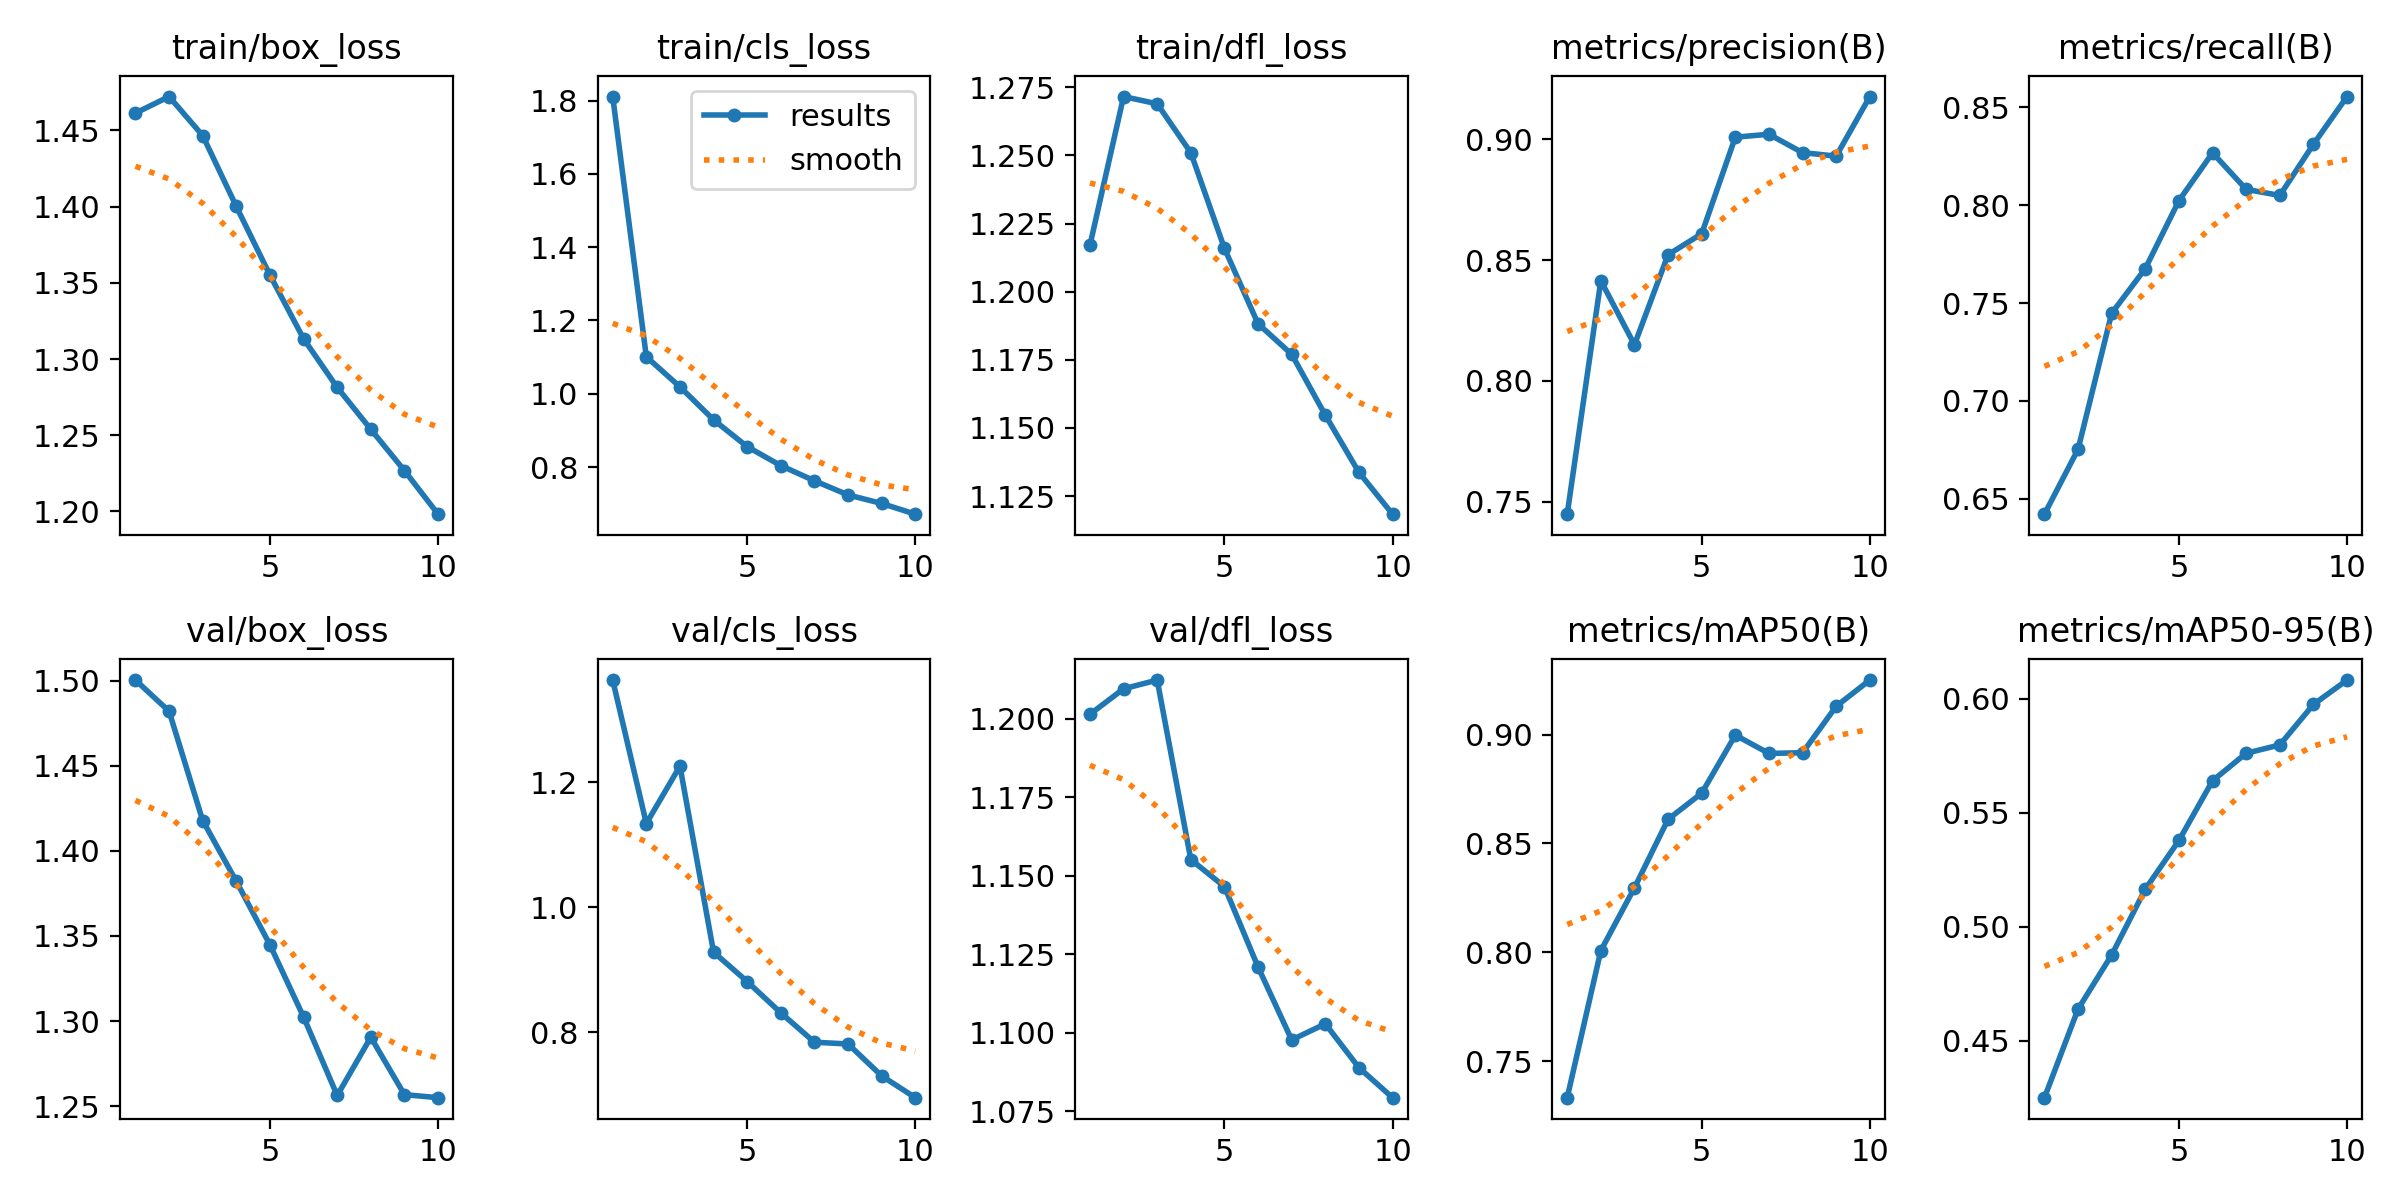

In [12]:
Image("/content/drive/MyDrive/alpaca_detection_yolo/bike-detection-generated10/runs/detect/train/results.png", width=900)

### Evaluation Metrics: Precision, Recall, and F1 Score

- **Precision**: Measures the proportion of correctly identified positive predictions out of all positive predictions. Useful when false positives are costly.

  $$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$$

- **Recall**: Measures the proportion of actual positives that were correctly identified. Important when false negatives are costly.

  $$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$$

- **F1 Score**: The harmonic mean of Precision and Recall, useful when a balance between the two is needed, especially with imbalanced datasets.

  $$\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

These metrics help evaluate model performance and provide insights into classification accuracy.



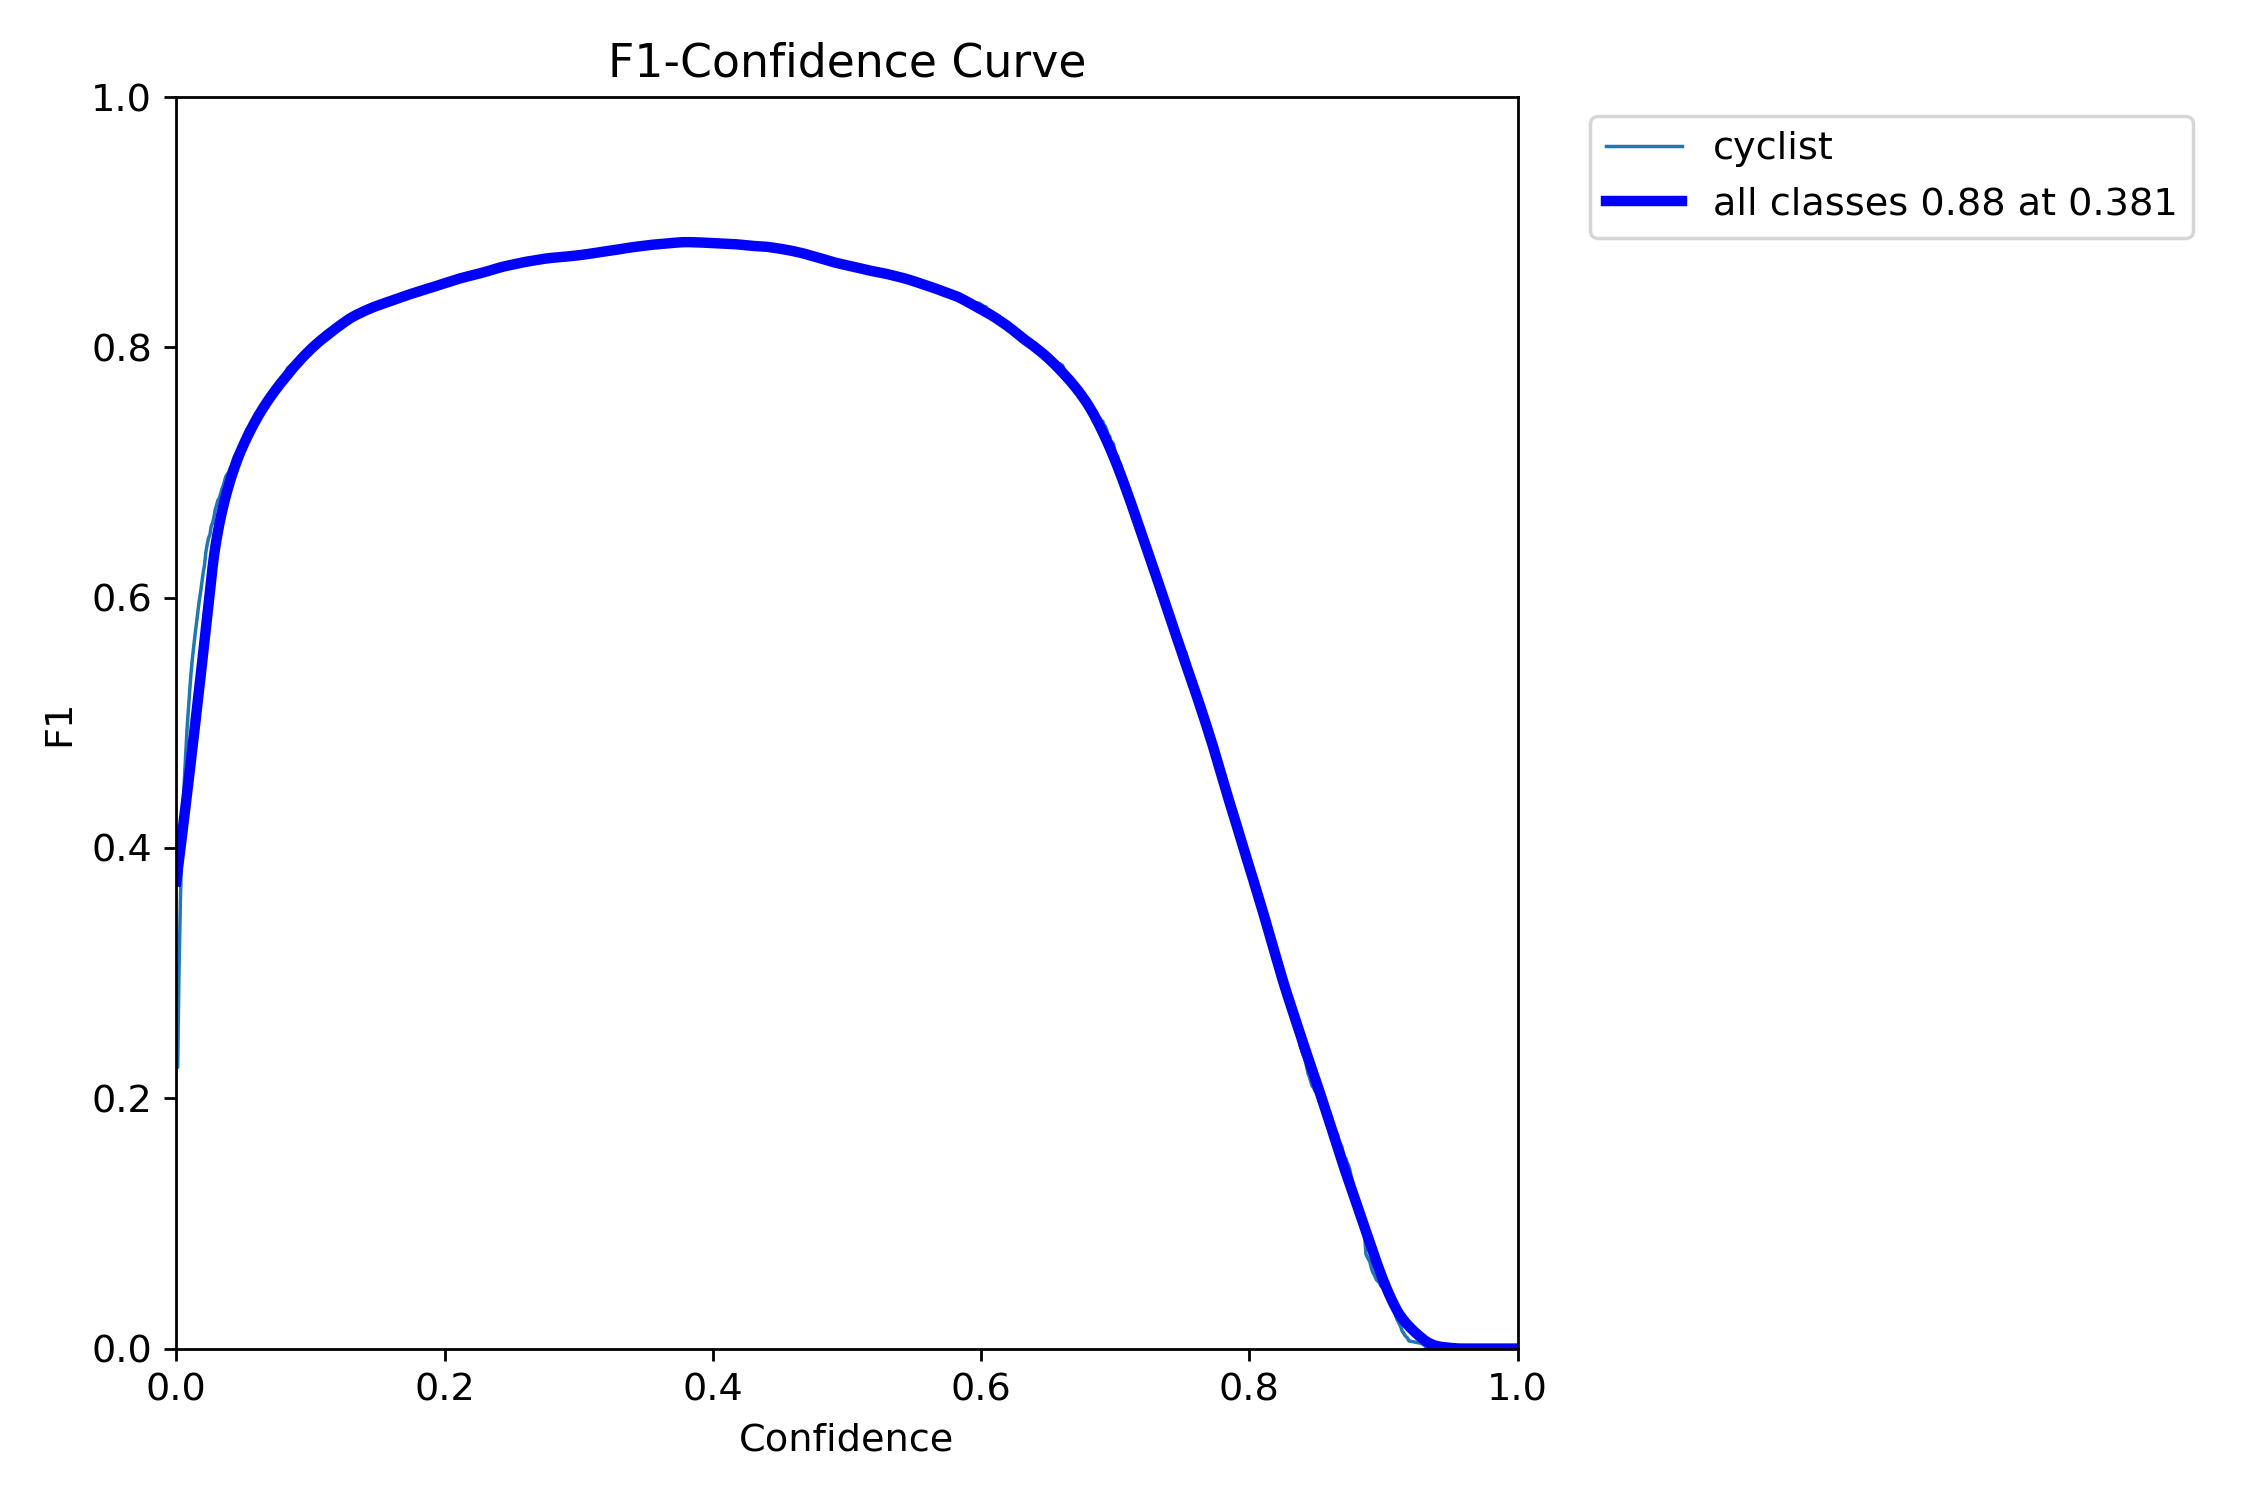

In [ ]:
Image("/content/drive/MyDrive/alpaca_detection_yolo/bike-detection-generated10/runs/detect/train/F1_curve.png", width=600)

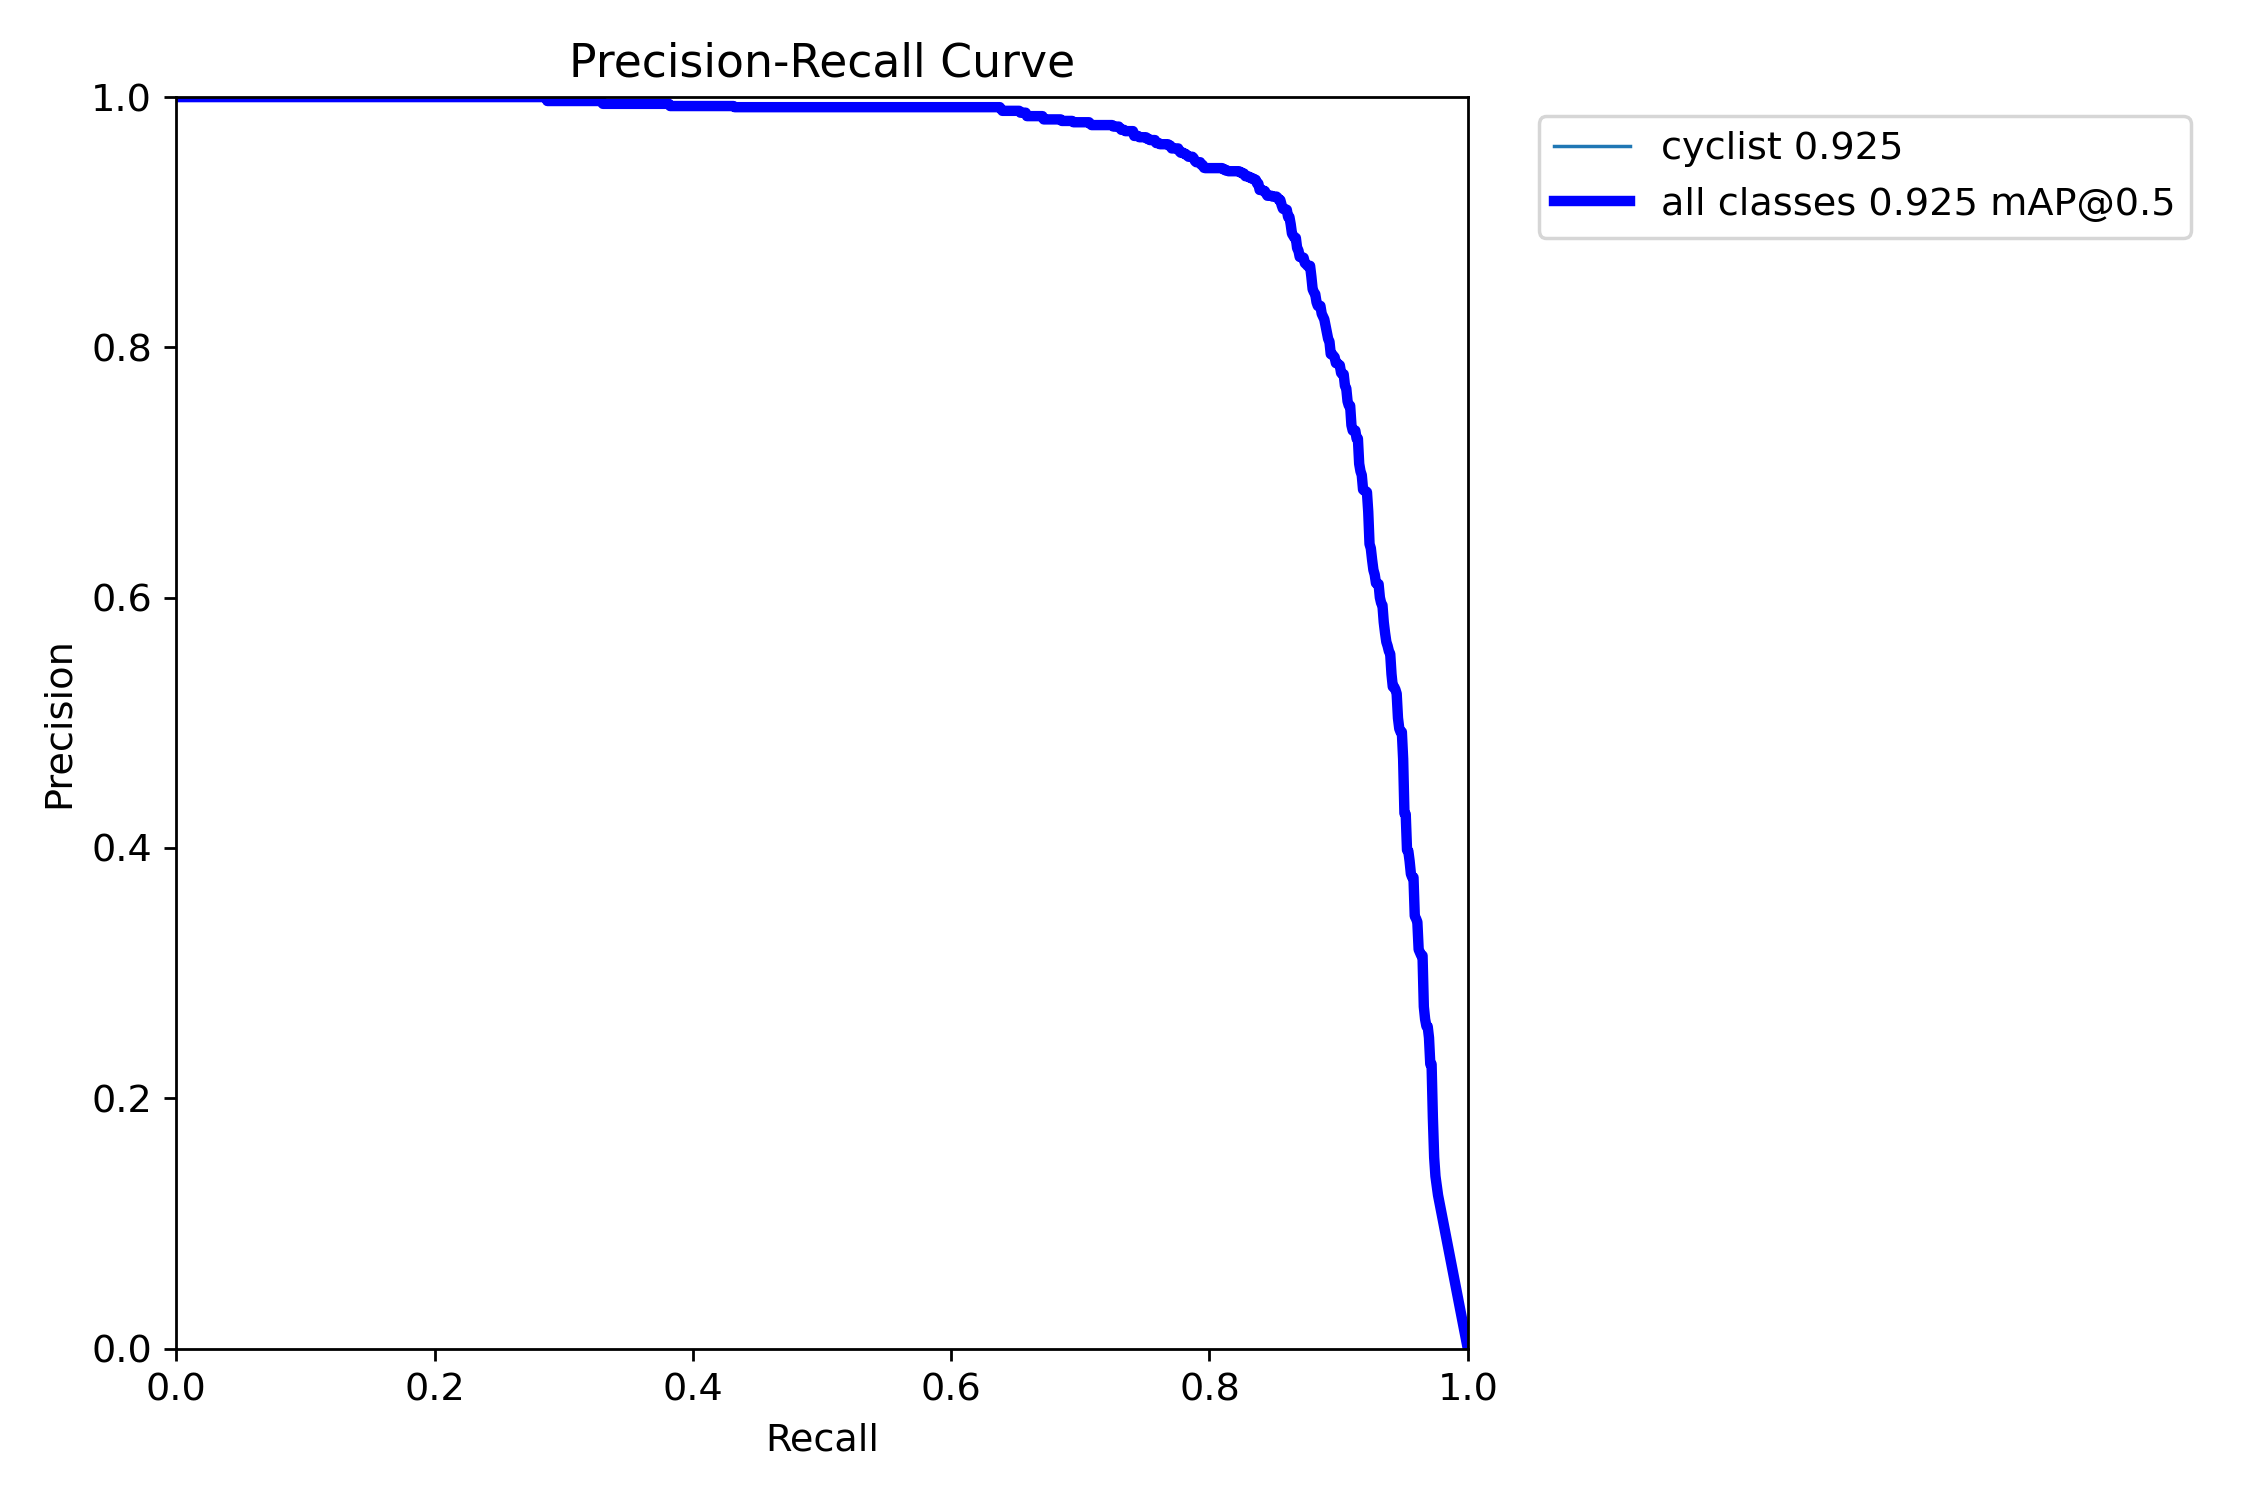

In [ ]:
Image("/content/drive/MyDrive/alpaca_detection_yolo/bike-detection-generated10/runs/detect/train/PR_curve.png", width=600)

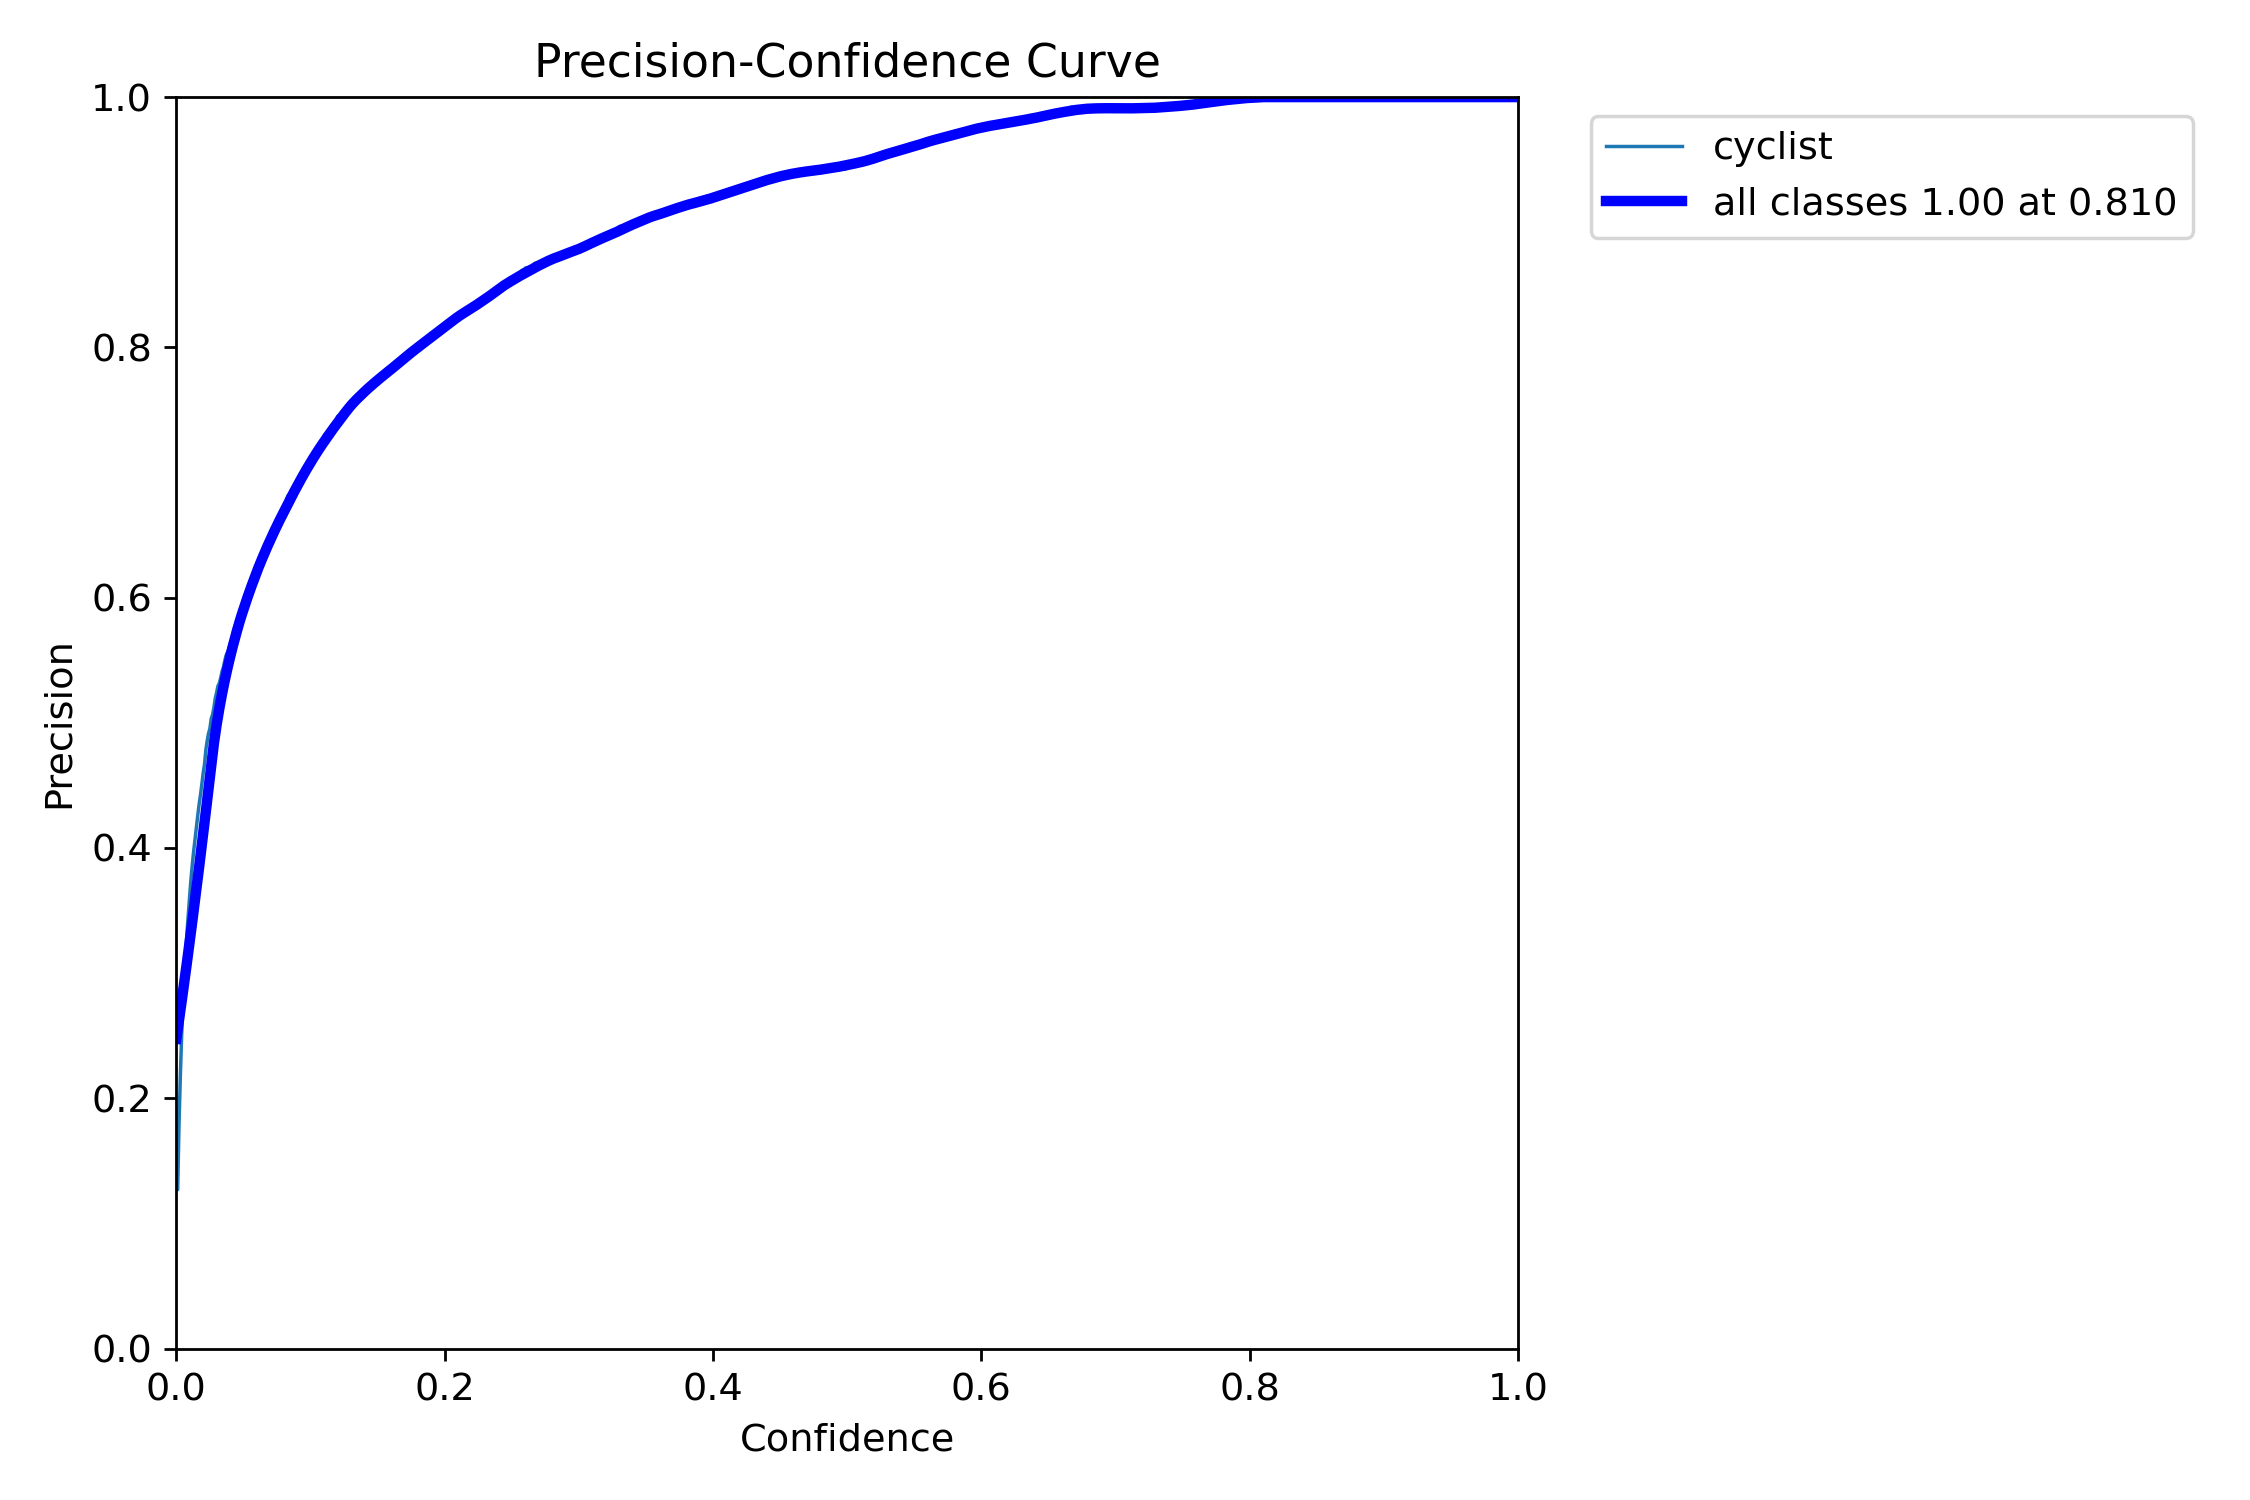

In [ ]:
Image("/content/drive/MyDrive/alpaca_detection_yolo/bike-detection-generated10/runs/detect/train/P_curve.png", width=600)

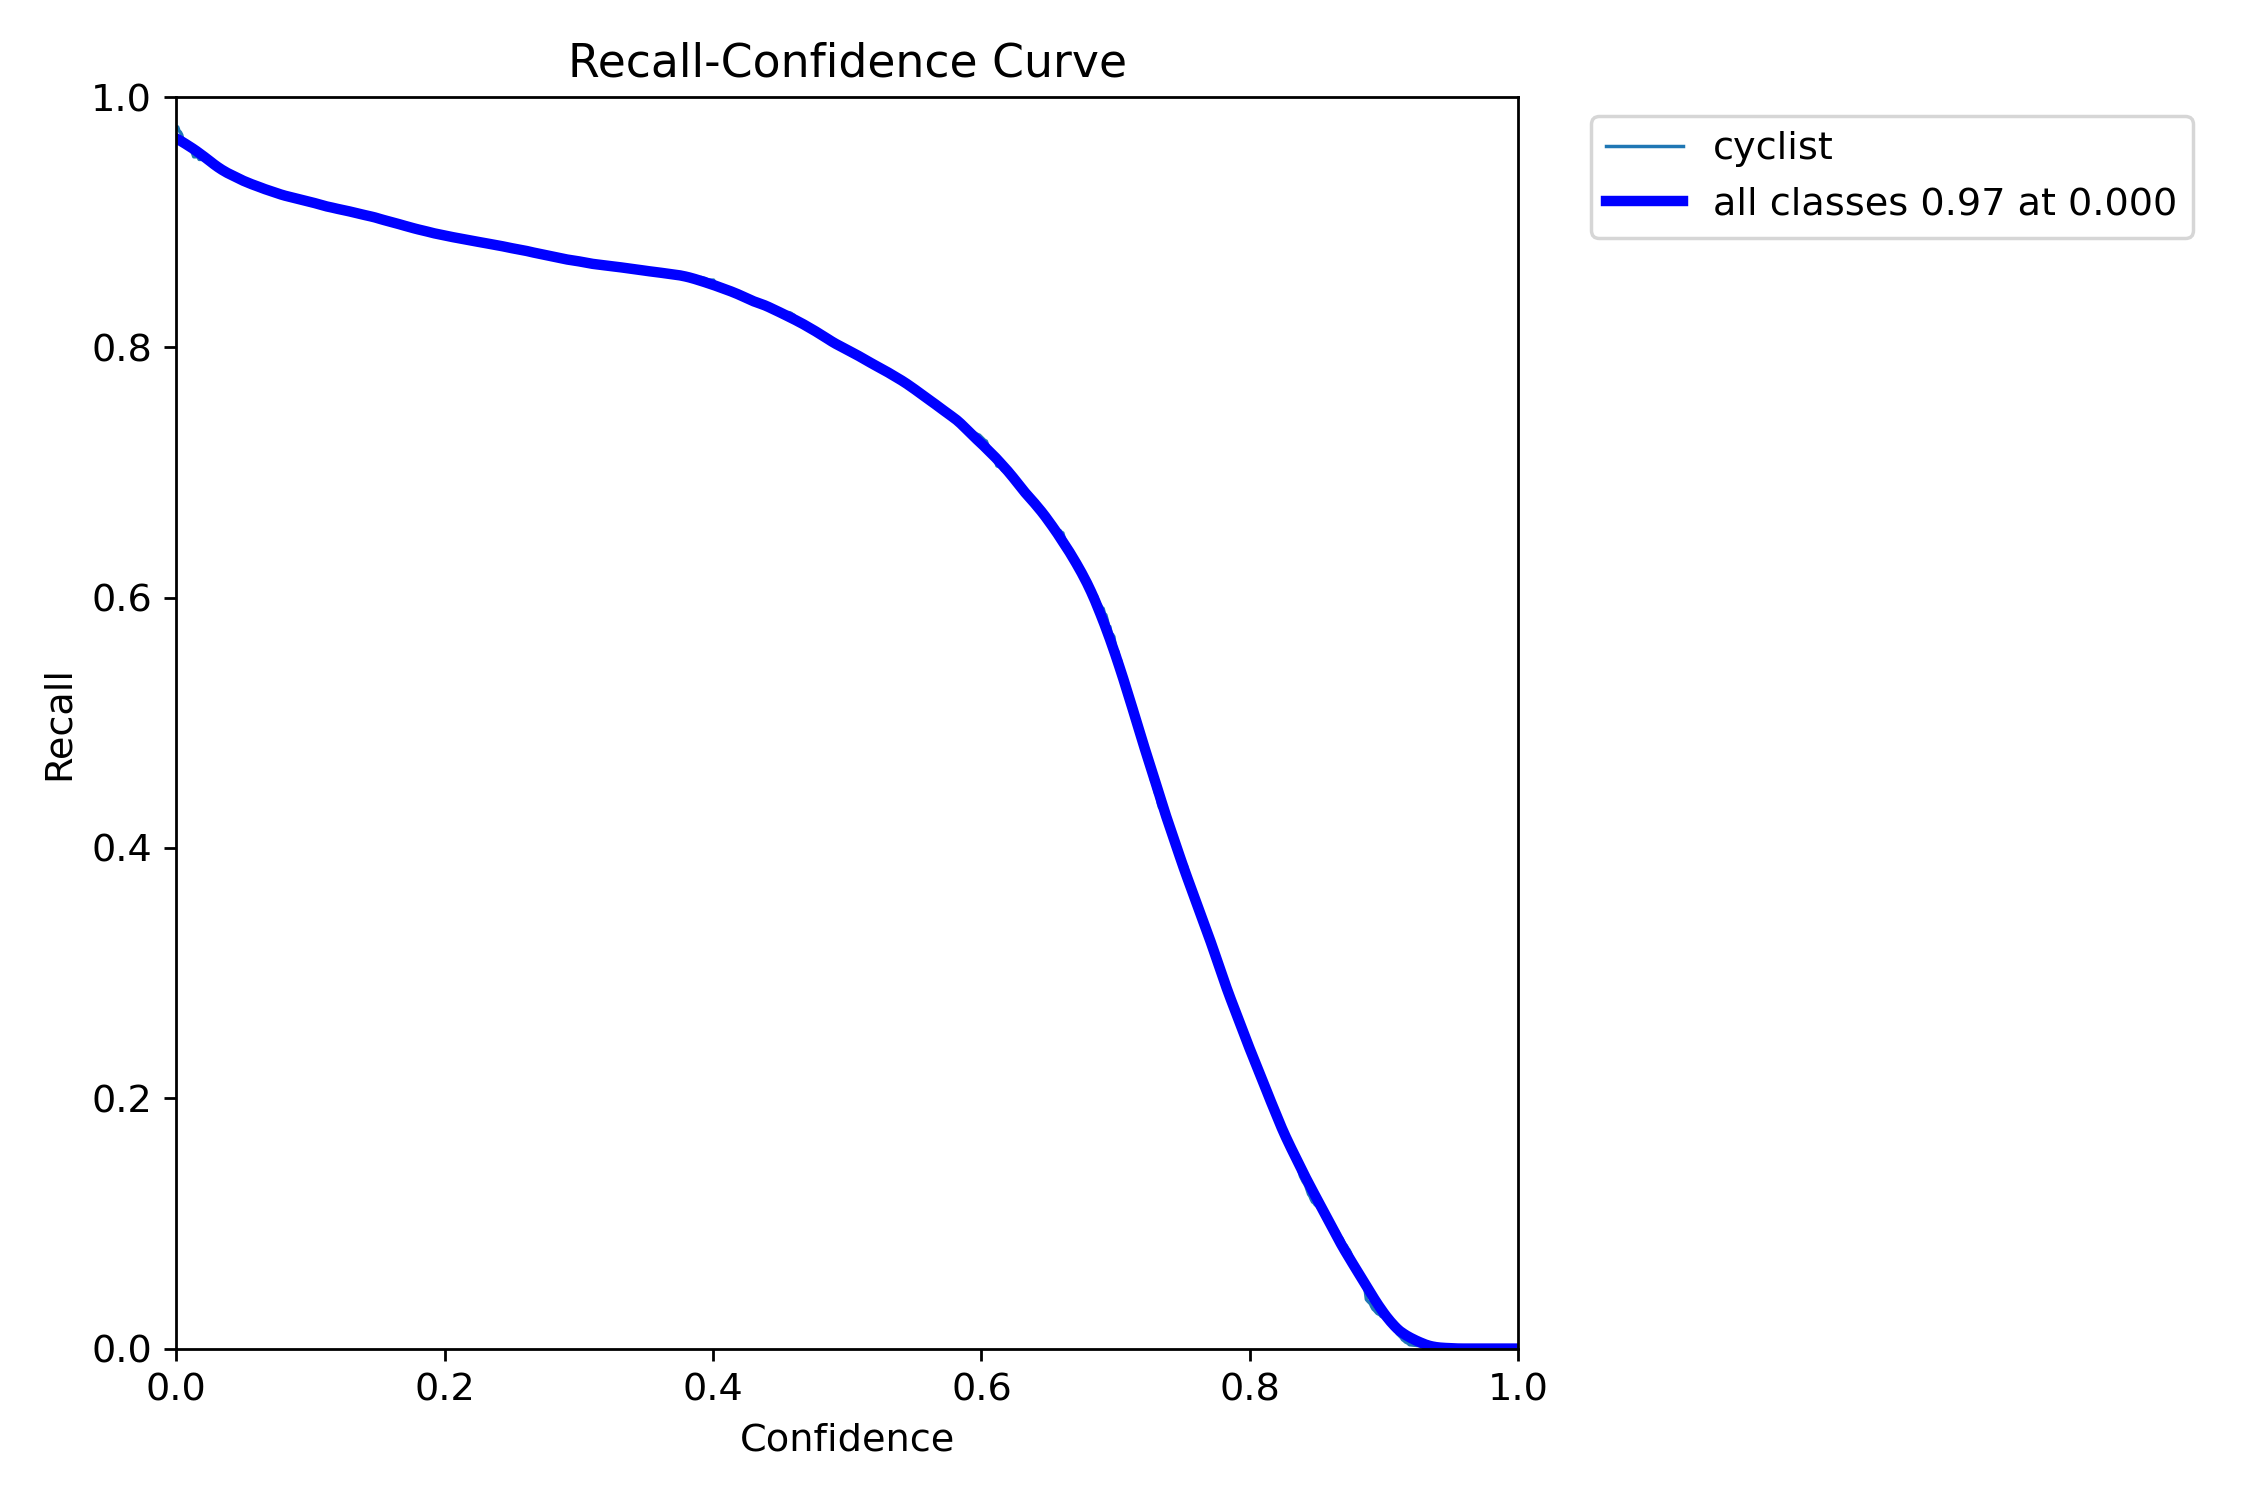

In [ ]:
Image("/content/drive/MyDrive/alpaca_detection_yolo/bike-detection-generated10/runs/detect/train/R_curve.png", width=600)

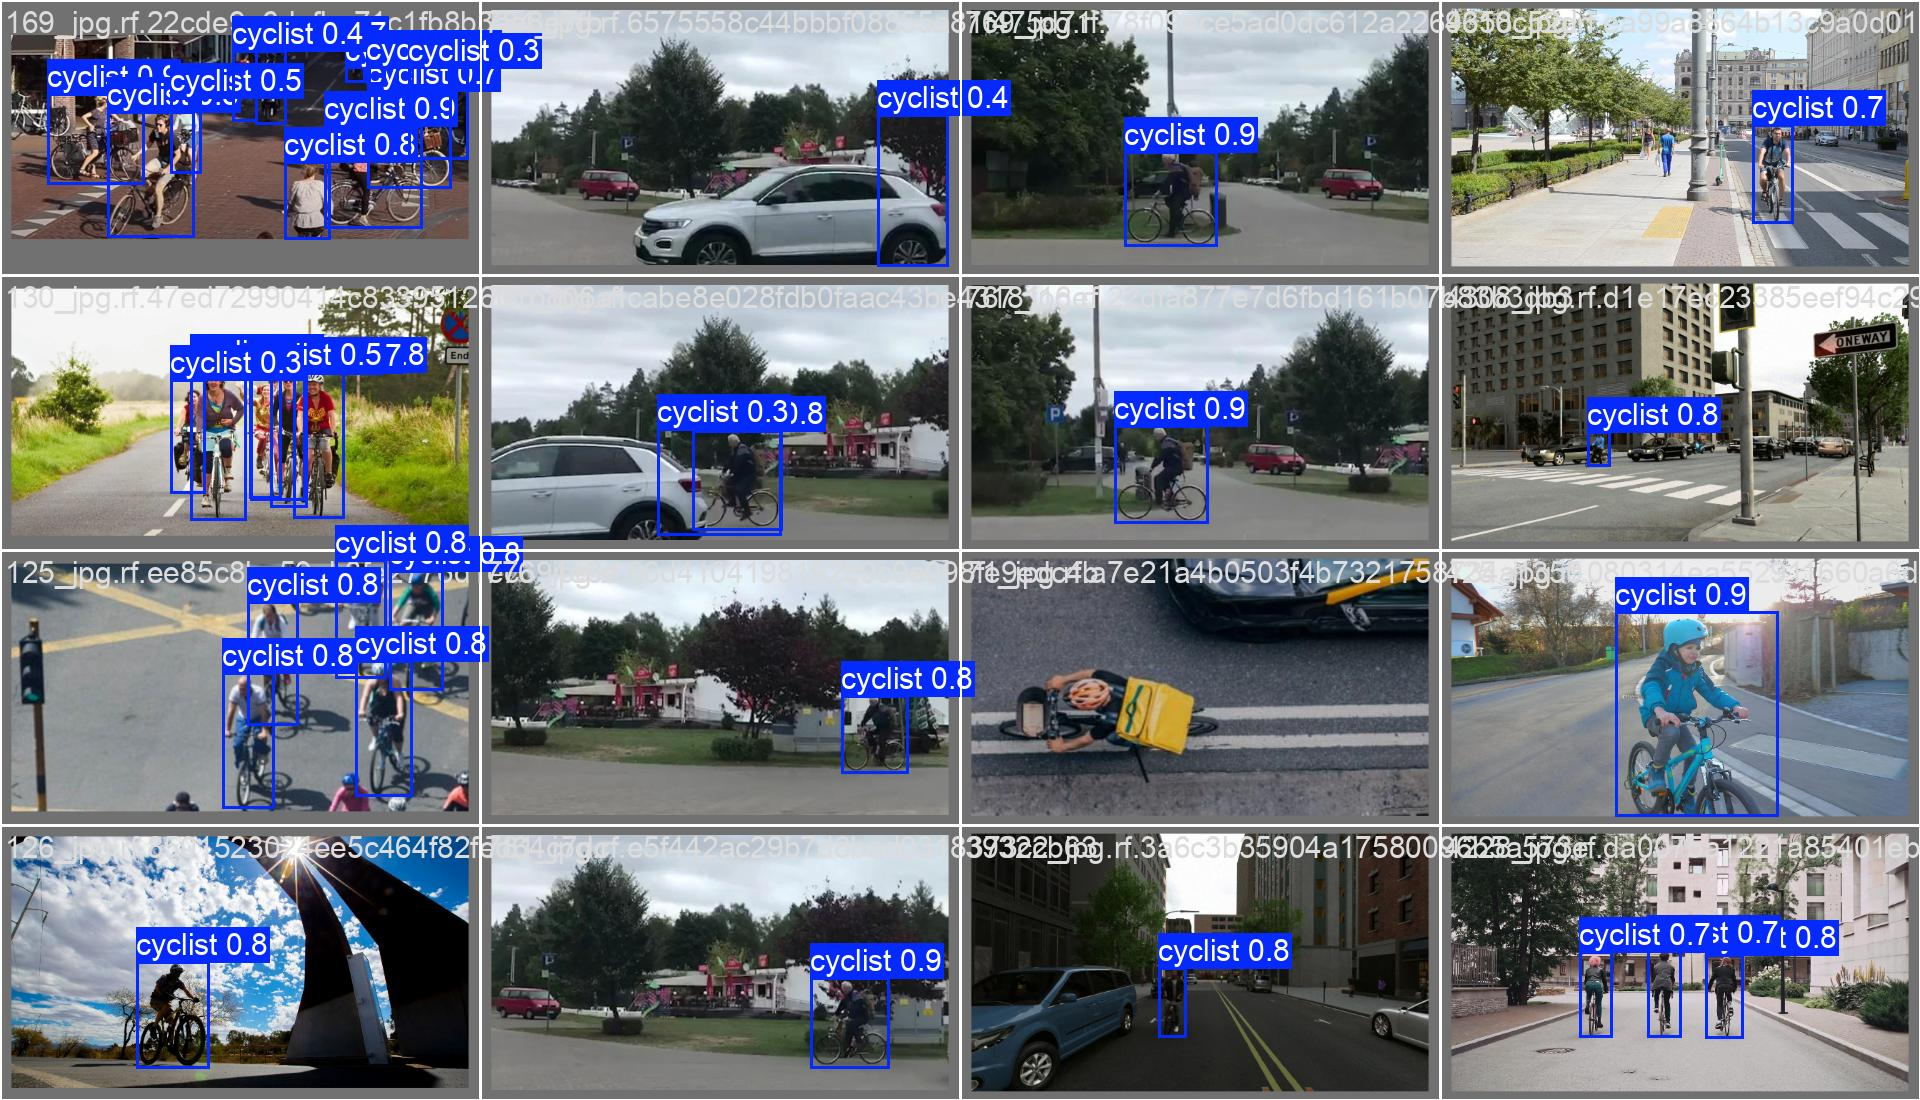

In [ ]:
Image("/content/drive/MyDrive/alpaca_detection_yolo/bike-detection-generated10/runs/detect/train/val_batch0_pred.jpg", width=600)

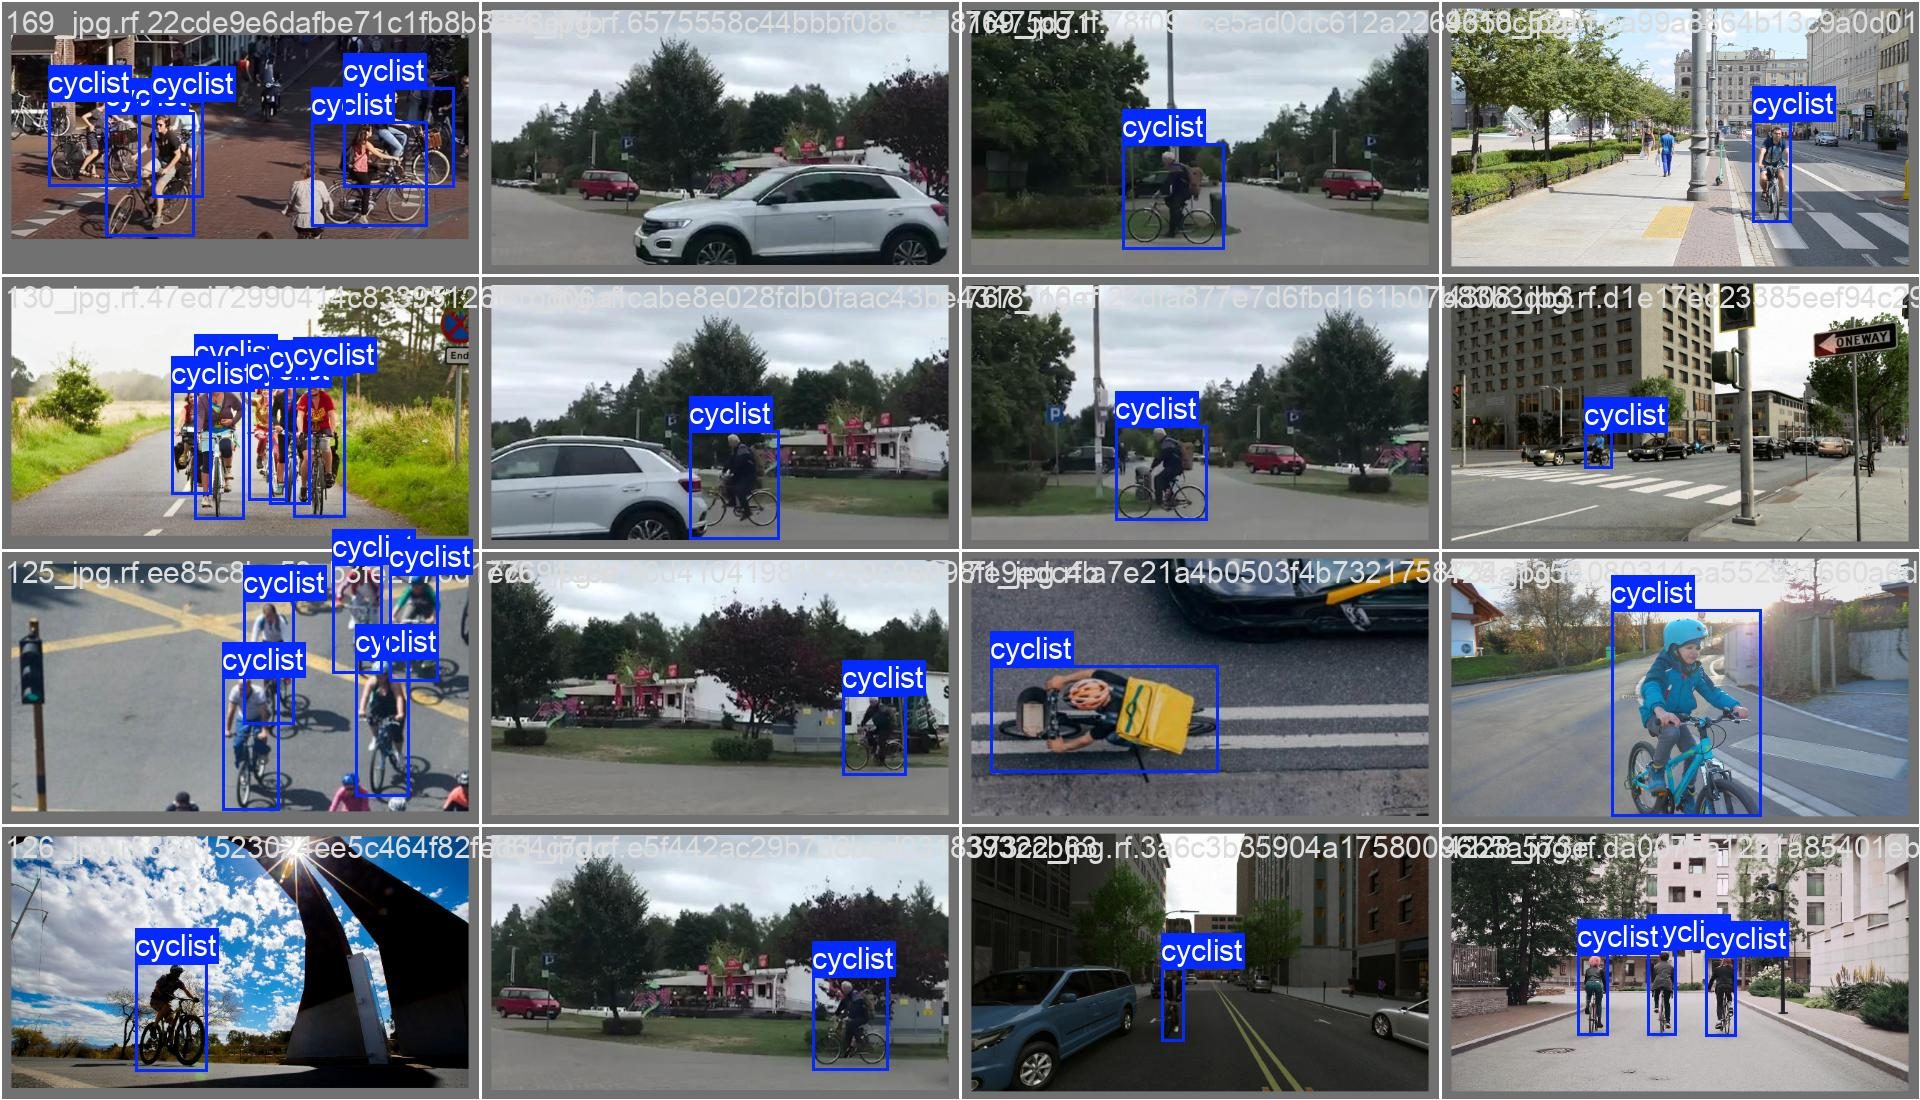

In [ ]:
Image("/content/drive/MyDrive/alpaca_detection_yolo/bike-detection-generated10/runs/detect/train/val_batch0_labels.jpg", width=600)

In [ ]:
!yolo task=detect mode=predict model= "/content/drive/MyDrive/alpaca_detection_yolo/bike-detection-generated/runs/detect/train/weights/best.pt" conf=0.25 source=cyclist0.jpg save=True


Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/cyclist0.jpg: 448x640 4 cyclists, 170.1ms
Speed: 13.7ms preprocess, 170.1ms inference, 33.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
import cv2
import ultralytics
from google.colab.patches import cv2_imshow  # For displaying images in Google Colab

# Load the YOLO model (make sure this is the path to your trained model)
model = ultralytics.YOLO('/content/drive/MyDrive/alpaca_detection_yolo/bike-detection-generated10/runs/detect/train/weights/best.pt')

# Constants for distance calculation
ACTUAL_HEIGHT = 1.7  # Real-world height in meters
FOCAL_LENGTH = 800  # Estimated camera focal length in pixels

def calculate_distance(actual_height, focal_length, object_height_in_image):
    """Calculate distance from camera to object based on object height in pixels."""
    return (actual_height * focal_length) / object_height_in_image

def detect_and_display_distance(image_path, model, actual_height=ACTUAL_HEIGHT, focal_length=FOCAL_LENGTH):
    """Detect objects in an image and display distance for each detected object."""

    # Load the image
    frame = cv2.imread(image_path)
    if frame is None:
        print(f"Error: Could not load image from {image_path}")
        return

    # Run the YOLO model on the image
    results = model.predict(frame)

    # Process detection results
    for result in results:
        for box in result.boxes:
            # Get bounding box coordinates
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            object_height_in_image = y2 - y1  # Calculate height in pixels

            # Calculate distance to object
            distance = calculate_distance(actual_height, focal_length, object_height_in_image)

            # Annotate the frame with bounding box and distance text
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box
            cv2.putText(frame, f"{distance:.2f} m", (x1, y1 - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2)


    # Display the annotated image in Colab
    cv2_imshow(frame)

# Usage example:
# Replace 'cyclist0.jpg' with the path to your test image
detect_and_display_distance('cyclist0.jpg', model)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
detect_and_display_distance('cyclist1.jpg', model)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!yolo task=detect mode=predict model= "/content/drive/MyDrive/alpaca_detection_yolo/bike-detection-generated10/runs/detect/train/weights/best.pt" conf=0.25 source="cyclist_video0.mp4" save=True


Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/431) /content/cyclist_video0.mp4: 384x640 2 cyclists, 243.8ms
video 1/1 (frame 2/431) /content/cyclist_video0.mp4: 384x640 2 cyclists, 235.1ms
video 1/1 (frame 3/431) /content/cyclist_video0.mp4: 384x640 2 cyclists, 229.1ms
video 1/1 (frame 4/431) /content/cyclist_video0.mp4: 384x640 2 cyclists, 219.8ms
video 1/1 (frame 5/431) /content/cyclist_video0.mp4: 384x640 2 cyclists, 223.5ms
video 1/1 (frame 6/431) /content/cyclist_video0.mp4: 384x640 2 cyclists, 207.4ms
video 1/1 (frame 7/431) /content/cyclist_video0.mp4: 384x640 2 cyclists, 216.1ms
video 1/1 (frame 8/431) /content/cyclist_video0.mp4: 384x640 2 cyclists, 176.9ms
video 1/1 (frame 9/431) /content/cyclist_video0.mp4: 384x640 2 cyclists, 133.2ms
video 1/1 (frame 10/431) /content/cyclist_video0.mp4: 384x640 2 cyclists, 139.3ms
video 1/1 (frame 11/431) /

In [ ]:
def detect_and_display_distance_video(video_path, model, actual_height=ACTUAL_HEIGHT, focal_length=FOCAL_LENGTH):
    """Detect objects in a video and display distance for each detected object."""

    # Open the video file
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error: Could not open video from {video_path}")
        return

    while True:
        ret, frame = cap.read()
        if not ret:
            print("End of video reached or error reading video.")
            break

        # Run the YOLO model on the current frame
        results = model.predict(frame)

        # Process detection results
        for result in results:
            for box in result.boxes:
                # Get bounding box coordinates
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                object_height_in_image = y2 - y1  # Calculate height in pixels

                # Calculate distance to object
                distance = calculate_distance(actual_height, focal_length, object_height_in_image)

                # Annotate the frame with bounding box and distance text
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box
                cv2.putText(frame, f"{distance:.2f} m", (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2)  # Distance text

        # Display the frame (or save it if needed)
        cv2_imshow(frame)  # For the first frame in Colab

        # Break if 'q' is pressed (optional for Colab)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the video capture object
    cap.release()
    cv2.destroyAllWindows()

# Usage example:
# Replace 'video.mp4' with the path to your test video file
detect_and_display_distance_video('cyclist_video0.mov', model)


# Detection Combined with Tracking

In [ ]:
from google.colab import files

# Define video source and output file path
video_source = "cyclist_video1.mp4"
output_path = "/content/output_annotated_video1.mp4"

# Initialize video writer
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
video_writer = None

def calculate_distance(bbox_width, focal_length=700, real_object_width=0.5):
    """
    Calculate distance from bounding box width using a simple inverse relationship.
    Adjust focal_length and real_object_width as needed.
    """
    return (focal_length * real_object_width) / bbox_width

def process_tracking_results(results, output_path, conf_threshold=0.35):
    """
    Process tracking results and save tracked video with bounding boxes, IDs, confidence levels, and distances.
    """
    global video_writer  # Use global video_writer to initialize once
    for result in results:
        frame = result.orig_img  # Original frame with detections and tracking
        tracked_objects = result.boxes  # Tracked objects with bounding boxes and IDs

        # Initialize video writer if not already done (using the frame's dimensions)
        if video_writer is None:
            height, width, _ = frame.shape
            video_writer = cv2.VideoWriter(output_path, fourcc, 30, (width, height))

        # Draw bounding boxes, IDs, confidence levels, and distances on the frame
        for box in tracked_objects:
            if box.conf[0] < conf_threshold:
                continue  # Skip detections below confidence threshold

            x1, y1, x2, y2 = box.xyxy[0].int().tolist()  # Bounding box coordinates
            obj_id = int(box.id.item()) if box.id is not None else "N/A"  # Extract integer ID or set to "N/A"
            confidence = box.conf[0]  # Confidence score
            bbox_width = x2 - x1  # Width of the bounding box
            distance = calculate_distance(bbox_width)  # Calculate distance

            # Set color based on distance
            color = (0, 0, 255) if distance < 2 else (0, 255, 0)  # Red if distance < 2m, otherwise green

            # Draw rectangle, ID, confidence, and distance on the frame
            cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
            cv2.putText(frame, f"ID: {obj_id}", (x1, y1 - 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
            cv2.putText(frame, f"Conf: {confidence:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
            cv2.putText(frame, f"Dist: {distance:.2f} m", (x1, y2 + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

        # Write the frame to the output video
        video_writer.write(frame)

# Track using ByteTrack with stream=True to avoid memory accumulation in Colab
results_bytetrack = model.track(source=video_source, stream=True, tracker="bytetrack.yaml", conf=0.35)

# Process the tracking results and save the output video
process_tracking_results(results_bytetrack, output_path)

# Release video writer resources
video_writer.release()

# Download the video to view it
files.download(output_path)


# MY NOTES

## Dataset Augmentation and Refinement

To improve model performance and reduce false positives, we plan to enhance the dataset with additional images, including:
- People without bikes and bikes without people in varied settings.
- Different angles of cyclists, as well as challenging scenarios involving diverse lighting conditions and partial occlusions.

This dataset refinement will allow the model to better distinguish between cyclists and similar objects in various real-world conditions, helping it learn nuanced differences and enhancing detection accuracy.

## Important Scenarios For the Model

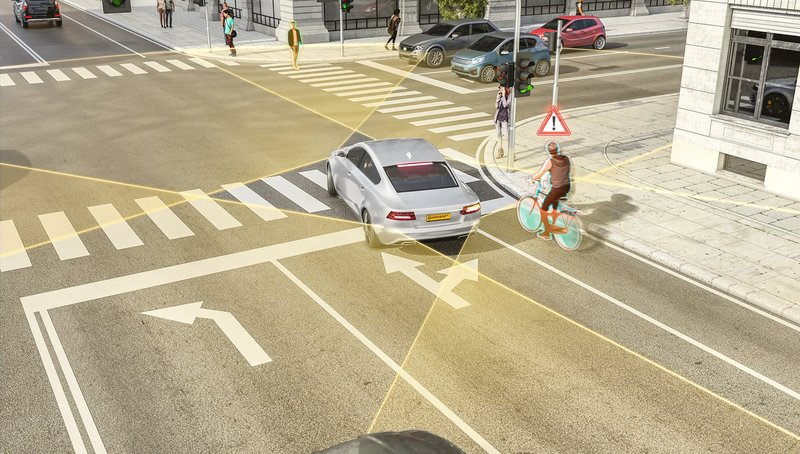

In [11]:
Image('/content/drive/MyDrive/alpaca_detection_yolo/bike-detection-generated10/cars_turn_right.jpg', width=900)

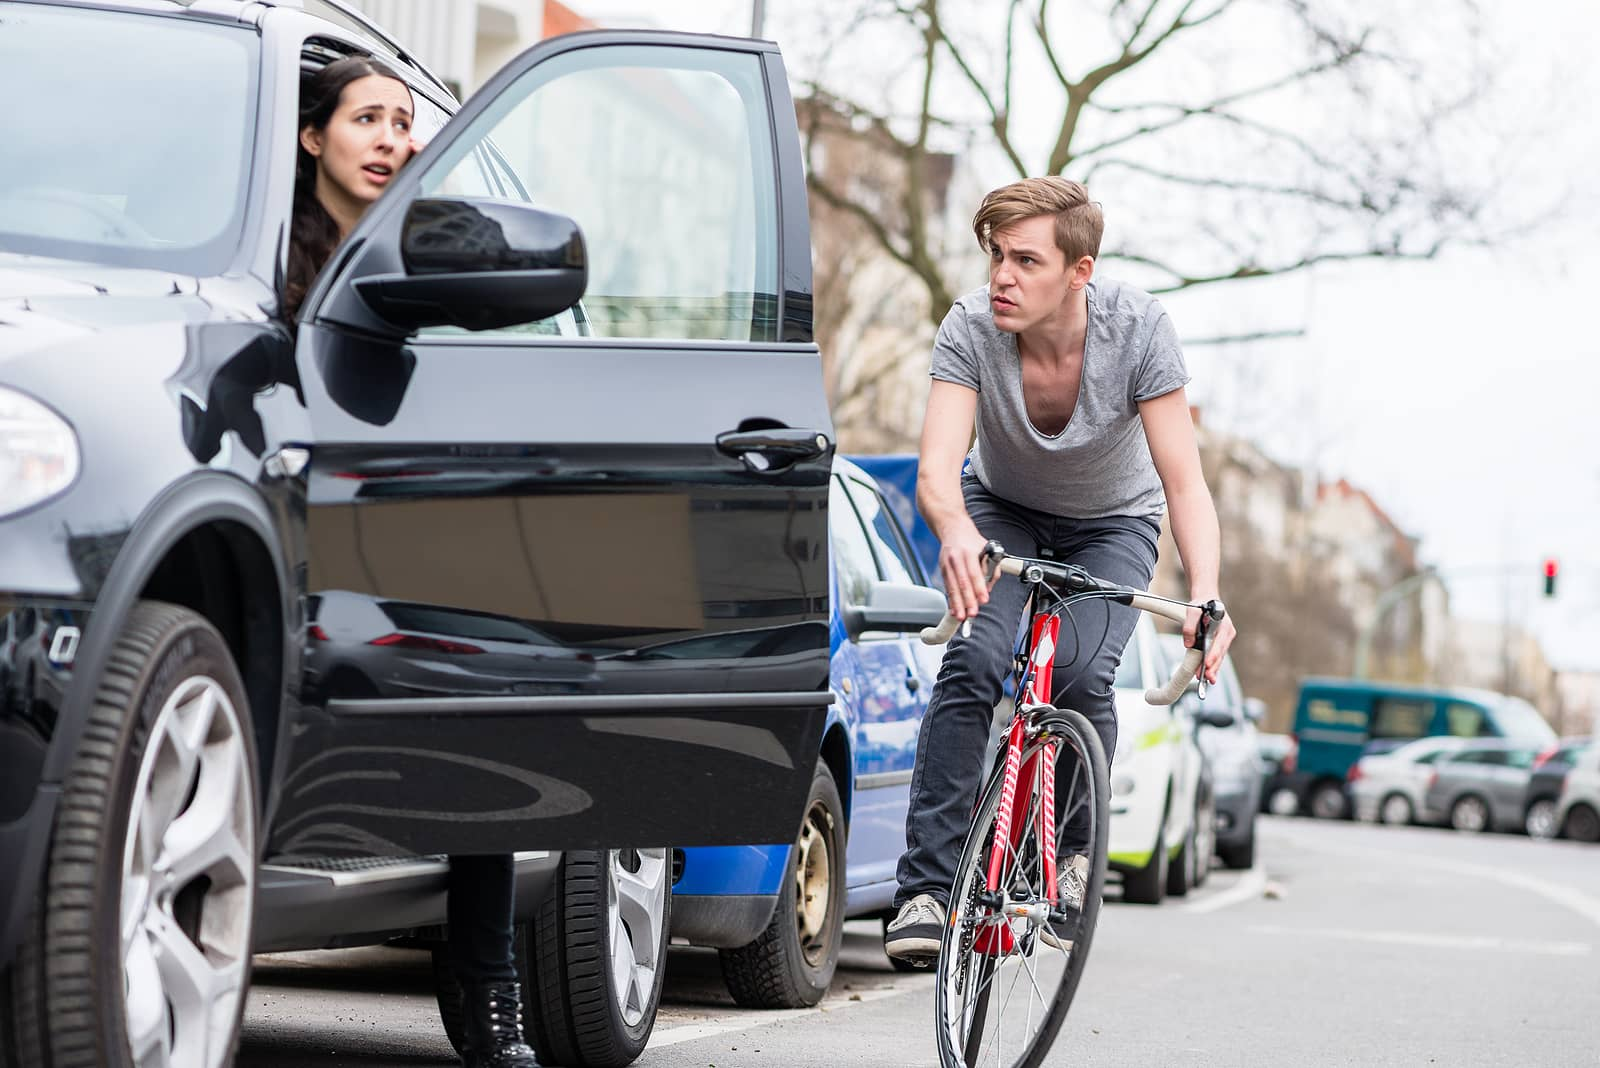

In [10]:
Image('/content/drive/MyDrive/alpaca_detection_yolo/bike-detection-generated10/car-dooring-bicycle-accident.jpg', width=900)